Enter the value of q [3]: 3
Enter the value of y0 [0]: 0
The trial solution is:  ci_1*x + ci_2*x**2 + ci_3*x**3
The functional is:
ci_1**2 + 2*ci_1*ci_2 + 2*ci_1*ci_3 + 5*ci_1/3 + 4*ci_2**2/3 + 3*ci_2*ci_3 + 3*ci_2/2 + 9*ci_3**2/5 + 7*ci_3/5
The Approximate Solution is: yt=  ci_1*x + ci_2*x**2 + ci_3*x**3


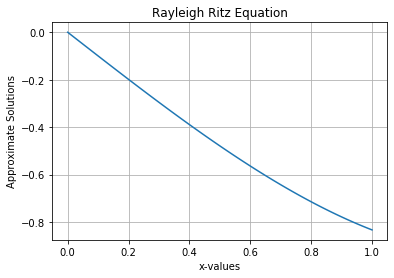

In [2]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

x=Symbol('x')
q=int(input("Enter the value of q [3]: "))
y0=int(input("Enter the value of y0 [0]: "))
basis = [x**i for i in range(q+1)]
ci=[Symbol("ci_%i" %i) for i in np.arange(q+1)]
y = y0 + sum(ci[i]*basis[i] for i in range(1,q+1))
print("The trial solution is: ",y)
k=Matrix([[0,0,0],[0,0,0],[0,0,0]])
f=Matrix(1,q,range(q))
for i in range(1,q+1):
        for j in range(1,q+1):
            k[i-1,j-1]=ci[i]*ci[j]*diff(basis[i],x)*diff(basis[j],x)
#print(sum(k.reshape(1,9)))

for i in range(1,q+1):
     f[i-1]=2*x*ci[i]*basis[i]+ci[i]
functional=integrate(sum(k.reshape(1,q**2))+sum(f),[x,0,1])

print("The functional is:")
print(functional)        
#Evaluation of Partial Derivatives
s1=Derivative(functional,ci[1])
d1=s1.doit()
s2=Derivative(functional,ci[2])
d2=s2.doit()
s3=Derivative(functional,ci[3])
d3=s3.doit()
xx=solve([d1,d2,d3],dict=True)
yt=y.subs(xx,x)
print("The Approximate Solution is: yt= ",yt)

xr=np.linspace(0,1,100)
yt=xr**3/6 - xr #The Approximate Solution

plt.plot(xr,yt)
plt.xlabel('x-values')
plt.ylabel('Approximate Solutions')
plt.title('Rayleigh Ritz Equation')
plt.grid(True)
plt.show()